In [3]:
using SummationByPartsOperators
using Plots
using Revise
using Distributions
using FFTW
using LinearAlgebra
using Base.Threads
using HDF5
using FileIO
using JLD2
 
includet("../PIC/PIC-1D/aux_functions/aux_functions.jl")
#includet("../PIC-1D/aux_functions/aux_functions.jl")
includet("local_aux_functions.jl")

In [4]:

data_name = "data_3d_h_step_cut_small_F_full_T200.jld2"
@show data = load("Results/" * data_name)

Dict{String, Any} with 7 entries:
  "u/u_00001" => [1.0 1.0 … 1.0 1.0; 0.0 0.0 … 0.0 0.0; 1.0 1.0 … 1.0 1.0; 0.0 …
  "par_grid"  => ([-110.495, 110.495, -110.495, 110.495, -110.495, 110.495], (2…
  "run_name"  => "data_3d_h_step_cut_small_F_full_T200"
  "u/u_00003" => [1.0 1.0 … 1.0 1.0; 0.0 0.0 … 0.0 0.0; 1.0 1.0 … 1.0 1.0; 0.0 …
  "par_evolv" => (200, 10, 400, 0.05)
  "u/u_00002" => [1.0 1.0 … 1.0 1.0; 0.0 0.0 … 0.0 0.0; 1.0 1.0 … 1.0 1.0; 0.0 …
  "u/u_00004" => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; NaN NaN … NaN NaN; NaN …

In [20]:
m = 4 #data_steps - 1
par_grid = data["par_grid"]
Box_x, J, n_fields = par_grid
par_evolv  = data["par_evolv"]
T, data_steps, int_steps, dt = par_evolv
run_name = data["run_name"]
size(data["u/u_00002"])
v = zeros(data_steps, size(data["u/u_00002"])...)
for m in 1:m
    tiempo = @sprintf("%05d", m)
    v[m,:,:,:,:] = data["u/u_$(tiempo)"]
end

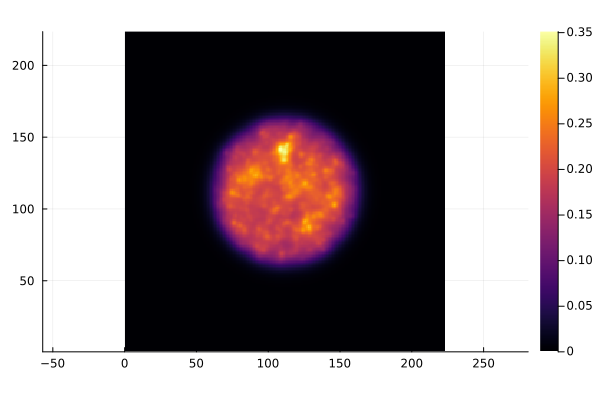

In [33]:
#surface(v[3,1,:,:,J[3] ÷ 2].-1 )
heatmap(v[3,1,:,:,J[3] ÷ 2].-1, aspectratio=1 )

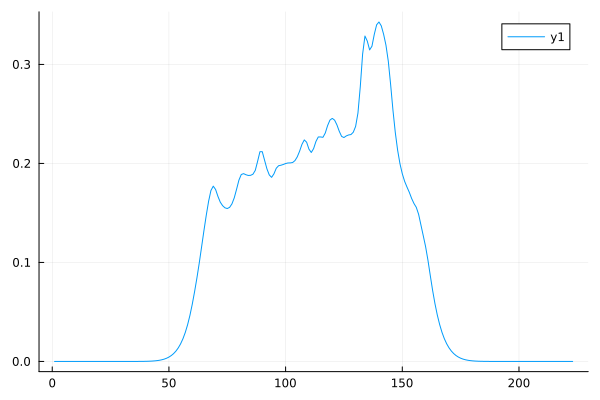

In [31]:
plot(v[3,1,:,J[2] ÷ 2 , J[3]÷ 2].-1)

In [ ]:

plot([get_norm_time(v,i)[1].-1 for i in 1:10], label="ϕ - 1" )
plot!([get_norm_time(v,i)[2] for i in 1:10], label="ϕ_t" )
plot!([get_norm_time(v,i)[3].-1 for i in 1:10], label="v - 1")
plot!([get_norm_time(v,i)[4] for i in 1:10], label="v_t")